In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import SelectPercentile, f_classif
import seaborn as sns


# Etapa 1

O objetivo do estudo era a análise de amostras de biópsia do músculo vasto lateral de adultos jovens (cerca de 24 anos) e idosos (cerca de 84 anos) antes e depois de 12 semanas de treino de resistência progressivo (extensões bilaterais de joelho, 3x10 reps, 3 vezes por semana, ou seja, 36 sessões). Os resultados fornecem informações sobre a adaptação molecular do músculo esquelético jovem e idosos ao treino de resistência.

### Carregamento de dados e metadados

In [5]:
data_ = pd.read_csv('gds5218.csv',sep=',', index_col = 0)
meta = pd.read_csv('Dataset9/meta-gds5218.csv', index_col = 0)

### Análise de dados e metadados

In [6]:
print(data_.values.shape)
print(meta.values.shape)

(54675, 110)
(110, 5)


Os dados são compostos por 54675 linhas e 110 colunas, e os metadados são compostos por 110 linhas e 5 colunas.

Para haver um igual numero de linhas terá de se proceder à criação da matriz de dados transposta.

In [19]:
data=data_.transpose()

In [20]:
data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM702357,1161.83,1747.50,391.9700,129.942,6.23465,615.193,2213.73,83.6992,170.800,336.059,...,83673.3,71618.3,135710.0,113779.0,10.72420,5.34155,7.09508,42.67930,48.88130,8.89686
GSM702358,1071.50,1478.97,470.1980,162.253,30.24650,664.879,2801.26,93.1001,169.827,245.628,...,101759.0,83884.1,163462.0,137384.0,12.12390,49.66260,6.25664,3.44921,10.83010,35.67100
GSM702359,1957.93,3048.85,222.0020,303.021,11.29660,633.465,3521.90,203.3780,245.756,223.729,...,103741.0,85303.0,160178.0,139390.0,7.23681,44.22810,17.42500,42.60820,10.65350,9.60037
GSM702360,1631.58,2239.77,94.4564,163.405,19.58400,603.815,2183.40,176.1910,132.306,325.766,...,78205.1,64982.8,131370.0,112634.0,13.89620,4.99506,17.93520,18.57420,52.96540,6.04493
GSM702361,1257.48,1964.19,75.2555,194.749,8.09821,773.341,2014.83,129.8250,141.455,458.195,...,96081.1,81951.2,168932.0,162014.0,8.08048,53.30800,2.45023,36.68630,87.73750,29.03530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM702462,2389.90,1547.92,218.2720,139.022,9.99853,407.085,3920.48,91.2476,202.017,176.646,...,94439.2,81906.2,141688.0,123163.0,8.93783,3.34912,2.34650,14.56350,5.22898,25.05870
GSM702463,3292.27,1795.70,294.3510,207.317,4.39820,612.102,2573.11,367.3700,374.945,225.441,...,73592.2,65665.1,123681.0,102585.0,3.41522,29.14640,2.66657,21.66290,32.65540,6.98870
GSM702464,1810.30,1594.53,320.2300,169.438,3.36096,758.122,1728.08,121.9930,379.436,150.923,...,71730.8,62500.8,117189.0,103567.0,52.94770,5.54407,6.54492,10.45950,12.55890,14.87360
GSM702465,3016.57,1204.23,336.7170,139.851,42.15550,438.175,1905.68,208.5920,301.076,106.048,...,67826.3,59747.2,110544.0,91439.1,5.83766,11.57100,1.83166,20.09810,33.36150,22.91700


In [27]:
descricao=data.describe()
descricao

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2110.879155,1691.253064,261.612032,164.555415,18.025280,589.587155,2795.621182,175.361365,196.294379,235.096968,...,86004.432727,73548.030909,139947.746364,121380.306364,11.038309,26.311358,8.979094,21.512623,30.756433,15.349617
std,645.625411,364.608314,110.024959,69.971940,17.390727,243.810571,783.409772,56.960527,113.314636,98.284531,...,12553.309983,10392.407290,20739.224076,23133.881202,9.800978,20.813101,7.856323,14.744102,20.325383,15.334459
min,880.367000,962.718000,75.255500,11.453300,1.758700,238.332000,1222.330000,33.471100,9.230840,69.887800,...,55124.800000,45965.200000,97299.100000,69313.700000,2.461270,3.349120,1.211720,1.860940,2.561100,2.084160
25%,1642.670000,1482.510000,190.303750,129.998250,5.711068,442.909000,2209.162500,142.821000,120.408750,159.664500,...,76674.950000,65176.925000,124404.500000,104064.500000,5.813022,9.823560,4.082002,9.009625,12.354075,5.760337
50%,2017.640000,1639.010000,239.715500,160.294000,9.532800,529.382000,2640.330000,170.109000,177.050500,213.295500,...,84517.200000,72891.300000,136396.000000,116431.500000,8.748015,21.568000,6.538035,20.063300,30.897850,7.668280
75%,2532.260000,1803.905000,309.892250,207.208750,30.550025,670.007750,3270.390000,206.644000,235.008250,305.806750,...,94106.250000,81006.800000,152469.500000,135547.250000,12.095950,38.761225,10.374825,32.710375,42.821325,19.602225
max,3933.020000,3048.850000,619.877000,378.568000,84.943600,2132.360000,5002.980000,367.370000,709.760000,494.081000,...,125391.000000,107061.000000,209777.000000,215554.000000,55.617600,85.342000,39.715800,72.645400,87.737500,80.119600


In [21]:
meta

,sample,age,time,gender,description
GSM702357,GSM702357,young,baseline,male,Value for GSM702357: T1_Pre_Male_Young (81373)...
GSM702358,GSM702358,young,baseline,male,Value for GSM702358: T1_Pre_Male_Young (81379)...
GSM702359,GSM702359,young,baseline,male,Value for GSM702359: T1_Pre_Male_Young (81390)...
GSM702360,GSM702360,young,baseline,male,Value for GSM702360: T1_Pre_Male_Young (81412)...
GSM702361,GSM702361,young,baseline,male,Value for GSM702361: T1_Pre_Male_Young (81422)...
...,...,...,...,...,...
GSM702462,GSM702462,old,4 h after final session,female,Value for GSM702462: T4_Post_Female_Old (81383...
GSM702463,GSM702463,old,4 h after final session,female,Value for GSM702463: T4_Post_Female_Old (81402...
GSM702464,GSM702464,old,4 h after final session,female,Value for GSM702464: T4_Post_Female_Old (81426...
GSM702465,GSM702465,old,4 h after final session,female,Value for GSM702465: T4_Post_Female_Old (81440...


In [ ]:
descricao_meta=meta.describe()
descricao_meta

Descrição e caracterização do dataset

Foram incluídos 28 indivíduos na investigação: Os jovens adultos eram 8 homens e 8 mulheres, os idosos eram 6 homens e 6 mulheres. As amostras foram retiradas antes da primeira sessão, 4h depois da primeira sessão, antes da última sessão e 4h depois da última sessão, resultando num total de 4 biópsias por indivíduo. 

Quanto aos metadados, verifica-se que possuem 5 variáveis: a amostra, a categoria de idade do indivíduo (young ou old), o tipo de amostra retirada (antes da primeira sessão, 4hr depois da primeira sessão, antes da última sessão ou 4h depois da última sessão), o sexo do indivíduo e os valores para aquele determinado indivíduo.


### Verificação dos tipos de atribudos dos dados e metadados

In [23]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)
# verificaçao do tipo de atributos nos metadados
print("\nTipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (dados):
1007_s_at          float64
1053_at            float64
117_at             float64
121_at             float64
1255_g_at          float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54675, dtype: object

Tipos de atributos (metadados):
sample         object
age            object
time           object
gender         object
description    object
dtype: object


### Verificação de Missing values

In [25]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
1007_s_at          0
1053_at            0
117_at             0
121_at             0
1255_g_at          0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54675, dtype: int64

Total de valores em falta nos dados:
0


In [26]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
age            0
time           0
gender         0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


## Sintese do Dataset

Dados: Os atributos dos dados são os diferentes tipos de gene (como por exemplo: 1007_s_at, AFFX-ThrX-5_at). Há 54675 atributos e são do tipo *float64*.

Metadados: Os atributos dos metadados são a amostra, a categoria de idade do indivíduo (young ou old), o tipo de amostra retirada (antes da primeira sessão, 4hr depois da primeira sessão, antes da última sessão ou 4h depois da última sessão), o sexo do indivíduo e os valores par aquele determinado indivíduo. Estes atributos são do tipo *object*.

## Pré-processamento

Procedeu-se à normalização dos dados, uma vez que não existem *missing values* no Dataset, caso houve-se procederia-se à eliminação destes usando a função *dropna*.

In [8]:
data_scale = preprocessing.scale(data.values)
data_scale.shape

(110, 54675)

## Selecção de metatados relevantes
Escolheu-se a coluna *time* como a única coluna relevante

In [ ]:
input_data=data.values
output_data=meta.values[:,2]

## Exploraçao Grafica



In [17]:
meta.groupby("time").size()

time
4 h after 1st session      28
4 h after final session    28
baseline                   27
prior to last session      27
dtype: int64

<Axes: >

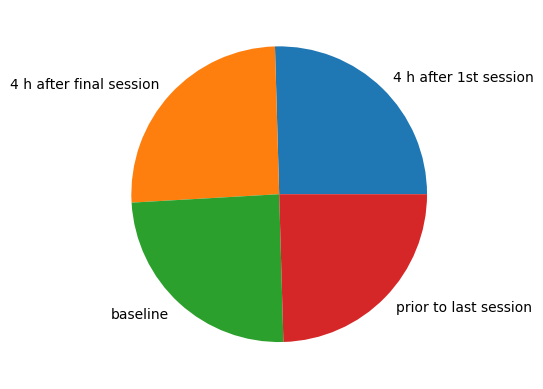

In [19]:
meta.groupby("time").size().plot.pie()

# Análise da estatística univariada e filtros

In [11]:
print(input_data)
input_data[:,1:].shape

[[1161.83    1747.5      391.97    ...   42.6793    48.8813     8.89686]
 [1071.5     1478.97     470.198   ...    3.44921   10.8301    35.671  ]
 [1957.93    3048.85     222.002   ...   42.6082    10.6535     9.60037]
 ...
 [1810.3     1594.53     320.23    ...   10.4595    12.5589    14.8736 ]
 [3016.57    1204.23     336.717   ...   20.0981    33.3615    22.917  ]
 [2670.62    1889.21     328.044   ...   26.3532     8.08511    5.63957]]


(110, 54674)

### Análise de Variabilidade

Conforme o dataset escolhido e com base nos teste estatísticos univariados, optamos por realizar o método  SelectBest, que trata os dados com maior relevância para efetuar avaliações de cada recurso, onde cada coluna correspondente a um gene.

Procedeu-se à escolha de 10% dos genes com maior variablidade. Caracteristicas com *p-value* inferior a 0.01 indicam uma maior significância estatística.

In [29]:
skb=SelectPercentile(f_classif, percentile=10)
skb.fit(data, output_data)
genes_dif = np.where(skb.pvalues_ <0.01) # selecionar só as colunas com os genes diferencialmente expressos
print("Genes com maior expressividade\n", data.columns[genes_dif])

Genes com maior expressividade
 Index(['1007_s_at', '1294_at', '1431_at', '1552279_a_at', '1552309_a_at',
       '1552310_at', '1552314_a_at', '1552316_a_at', '1552322_at',
       '1552323_s_at',
       ...
       '65438_at', '65472_at', '65493_at', '65630_at', '65635_at', '65884_at',
       '78495_at', '823_at', '87100_at', '89977_at'],
      dtype='object', length=9473)


# Estapa 2:

Nesta etapa vamos usar técnicas de redução de dimensionalidade aos dados e aplicar métodos de *clustering* para este Dataset

## Aprendizagem Não Supervisionada
A aprendizagem não supervisionada desempenha um papel fundamental na exploração de conjuntos de dados complexos, procurando identificar grupos naturais e padrões subjacentes. Uma das técnicas mais comuns utilizadas para essa finalidade é o clustering de dados, onde são aplicados algoritmos para agrupar ocorrências de dados semelhantes, simplificando a análise e permitindo a identificação de padrões nos dados.

Ao empregar algoritmos de clustering, o objetivo é reduzir a dimensionalidade dos dados, agrupando-os de acordo com as suas características intrínsecas. Isto não apenas simplifica a análise dos dados, mas também oferece uma maneira eficaz de identificar anomalias e outliers, que podem ser de grande importância em diversas áreas.

#### Cálculo da média e desvio padrão dos dados

In [13]:
print("Average: ", data_scale.mean())
print("Standard Deviation: ", data_scale.std())

Average:  -9.00428392666684e-18
Standard Deviation:  0.9999999999999998


####  Reduzir a dimensionalidade dos dados a partir do PCA

In [30]:
pca = PCA(n_components=0.9)
X_r = pca.fit(data_scale).transform(data_scale)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))

pca.explained_variance_ratio_.sum()

n=X_r.shape[1]
n

Explained Variance: [0.10070076 0.0554195  0.05193143 0.03838898 0.03230233 0.02583563
 0.02454529 0.01842388 0.01631893 0.01449994 0.01361184 0.01294931
 0.0120253  0.01162367 0.01122328 0.01079044 0.0103974  0.01003747
 0.00984668 0.00963998 0.00944416 0.00908916 0.00897877 0.00870587
 0.00851975 0.00841415 0.00817531 0.00809932 0.00796471 0.00786655
 0.00768176 0.00762212 0.00750679 0.00745544 0.00730759 0.00719203
 0.00717467 0.00703089 0.00700046 0.00695005 0.00678736 0.00677532
 0.00665701 0.00653891 0.00648149 0.00645327 0.00639778 0.00634832
 0.00628127 0.0062299  0.00618421 0.0061518  0.0060527  0.00596138
 0.00587474 0.00580415 0.00576403 0.0057113  0.00565671 0.0056406
 0.00556869 0.00555114 0.00548476 0.00544543 0.0054316  0.0053929
 0.00528683 0.00525631 0.005245   0.005174   0.00517147 0.00515657
 0.00506986 0.00502521 0.00497974 0.00495513 0.00494519 0.00491569
 0.0048647  0.00482402 0.00477855 0.00473826 0.00471338 0.00470185
 0.00466048 0.00462564]


86

##### Verificação do resultados do PCA e realização do histograma do mesmo

Assim  é possível observar que são necessários 86 componentes para explicar 90% da variabilidade



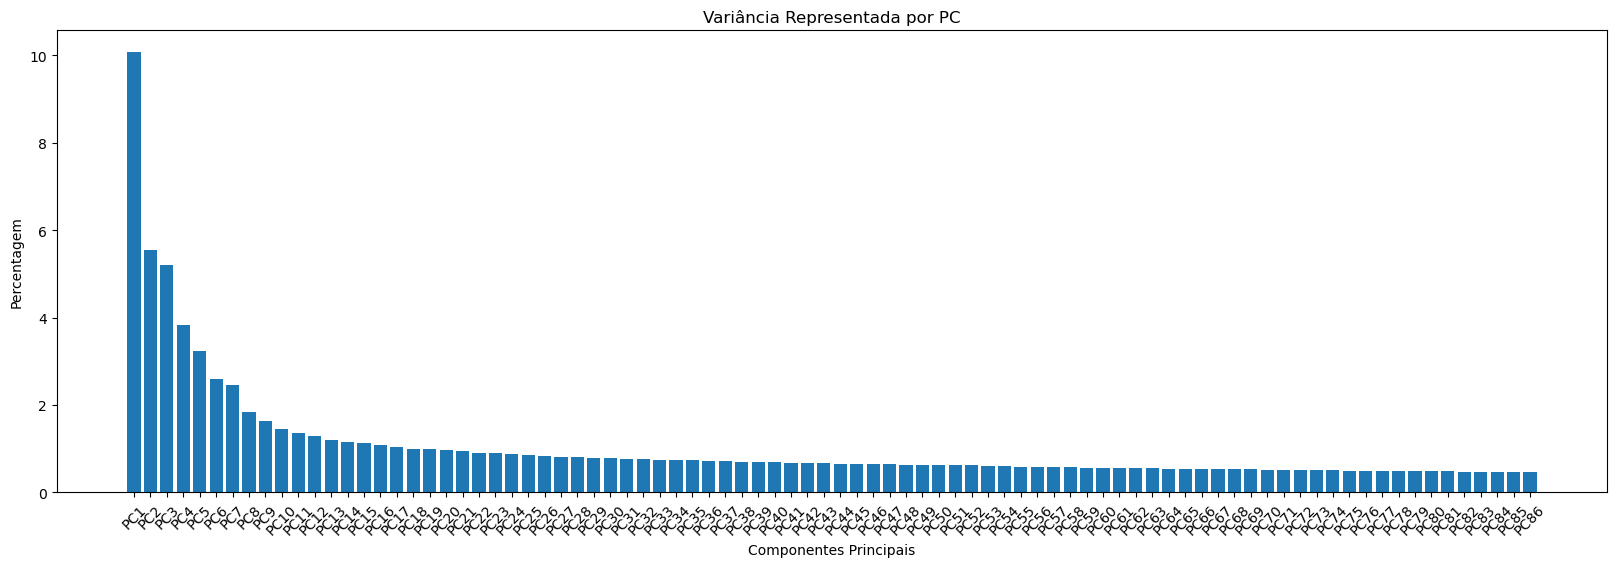

In [12]:
plt.figure(figsize=(20, 6))
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=45)
plt.rc('xtick', labelsize=8)
plt.title("Variância Representada por PC")
plt.ylabel("Percentagem")
plt.xlabel("Componentes Principais")
plt.show()

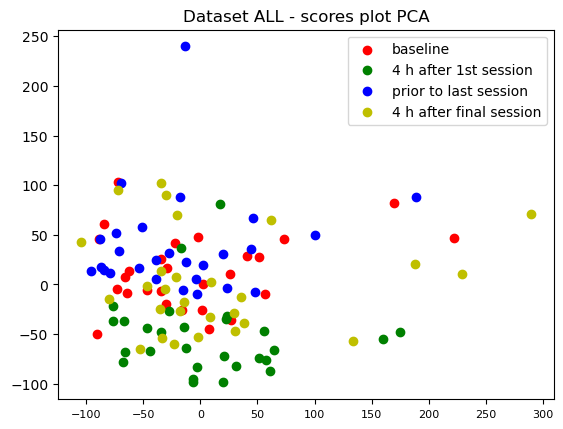

In [32]:
output_data=meta.values[:,2]
plt.figure()
for c, name in zip("rgby", ["baseline", "4 h after 1st session","prior to last session","4 h after final session"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

###  Aprendizagem Não-Supervisionada
A aprendizagem não supervisionada desempenha um papel fundamental na exploração de conjuntos de dados complexos, procurando identificar grupos naturais e padrões subjacentes. Uma das técnicas mais comuns utilizadas para essa finalidade é o clustering de dados, onde são aplicados algoritmos para agrupar ocorrências de dados semelhantes, simplificando a análise e permitindo a identificação de padrões nos dados.

Ao empregar algoritmos de clustering, o objetivo é reduzir a dimensionalidade dos dados, agrupando-os de acordo com as suas características intrínsecas. Isto não apenas simplifica a análise dos dados, mas também oferece uma maneira eficaz de identificar anomalias e outliers, que podem ser de grande importância em diversas áreas.

#### Clustering Hierárquico Aglomerativo

Nesta estapa foi necessario utlizar um clustering hierárquico aglomerativo, para a organização dos dados standardizados respetivos ao 'time', o qual possui 4 diferentes variaveis e portanto 4 números de clusters. Neste tipo de Clustering é seguido uma abordagem de baixo para cima, onde cada ponto de dados começa como um cluster individual e, em seguida, clusters adjacentes são sucessivamente combinados com base em sua similaridade. 

In [31]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="complete")
hclust.fit(data_scale) #
# Elaboração de uma tabela cruzada entre o tempo e o clustering
res_hc = hclust.labels_
pd.crosstab (meta["time"], res_hc)

col_0,0,1,2,3
time,,,,
4 h after 1st session,26,2,0,0
4 h after final session,25,3,0,0
baseline,24,2,0,1
prior to last session,25,1,1,0


#### K-means Clustering
O algoritmo de clustering k-Means é uma técnica de aprendizagem não supervisionada que visa agrupar os dados em k clusters diferentes. O objetivo é criar grupos onde os pontos estejam próximos dos centróides dos clusters, minimizando as distâncias entre eles.

A conclusão do processo de clustering k-Means ocorre quando há convergência, ou seja, quando o centróide não muda significativamente entre iterações, ou quando o número especificado de iterações é alcançado. Após isto, obtemos uma solução na qual cada ponto está atribuído a um dos k clusters, e os centróides representam o centro de cada cluster.

In [15]:
from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids= kmeans.cluster_centers_
pd.crosstab (labels,meta["time"],rownames=['clusters'])

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


time,4 h after 1st session,4 h after final session,baseline,prior to last session
clusters,,,,
0,2,4,2,2
1,8,7,9,12
2,13,11,11,7
3,5,6,5,6


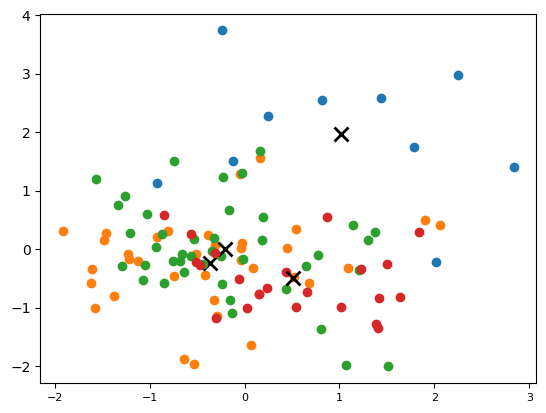

In [16]:
# Representação gráfica de centróides 2D

k = 4

for i in range(k):
    ds = data_scale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    
    plt.setp(lines,mew=2.0)    
    
plt.show()

In [36]:
input_dif = data_scale[:,genes_dif[0]]
pca = PCA(n_components=86)
X_r = pca.fit(input_dif).transform(input_dif)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Explained Variance: [0.17243323 0.10502153 0.07806633 0.0461545  0.03818734 0.03164159
 0.02495275 0.01914293 0.01746355 0.01522027 0.01347041 0.01330029
 0.01202414 0.01056055 0.01031154 0.00968378 0.00902319 0.00878359
 0.00845862 0.00816836 0.00786288 0.00785591 0.00745869 0.00724988
 0.00705898 0.00698521 0.00673943 0.00667934 0.00646775 0.00613565
 0.00607399 0.00588165 0.00584418 0.00575145 0.00557704 0.00549093
 0.00544289 0.00531313 0.00514641 0.00495568 0.00493133 0.00484892
 0.0048133  0.00470632 0.00450197 0.00446521 0.00443073 0.00433642
 0.00426262 0.00421726 0.0040997  0.00403466 0.00397784 0.0039074
 0.00388666 0.00384835 0.00377266 0.00372026 0.00362131 0.00360011
 0.00357711 0.00354125 0.00349693 0.00344267 0.00338581 0.00336905
 0.00332277 0.00331289 0.00323892 0.00322752 0.00321583 0.00314472
 0.00310397 0.00307768 0.00301806 0.00298209 0.00296315 0.00293377
 0.00291625 0.00287859 0.00282437 0.00281396 0.00278817 0.00276344
 0.00271795 0.00269543]


0.94277494157291

In [ ]:
plt.figure()
for c, name in zip("rgby", ["baseline", "4 h after 1st session","prior to last session","4 h after final session"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

#### Agglomerative Clustering para uma seleção específica de genes diferencialmente expressos

In [37]:
hclust = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="complete") 
hclust.fit(input_dif) 
res_hc = hclust.labels_
pd.crosstab (meta["time"], res_hc)

col_0,0,1,2,3
time,,,,
4 h after 1st session,0,2,0,26
4 h after final session,3,6,3,16
baseline,0,25,2,0
prior to last session,1,25,1,0


### Clustering Hierárquico

O Clustering Hierárquico é uma técnica de agrupamento de dados que constrói uma hierarquia de clusters utilizando uma abordagem iterativa. Neste método, objetos semelhantes são agrupados em clusters progressivamente maiores, formando uma estrutura hierárquica.

Na variante aglomerativa do clustering hierárquico, a fusão de clusters é determinada pela distância entre eles. Inicialmente, cada objeto é considerado um cluster individual. De seguida, os clusters mais próximos entre si são fundidos com base na dissimilaridade entre eles. Este processo de fusão é repetido até que todos os objetos façam parte de um único cluster.

Um aspeto importante deste método é a representação visual da hierarquia de clusters através de um dendrograma, que ilustra as relações entre os clusters de forma intuitiva.

Abaixo estão apresentados os resultados para diferentes métodos de linkage: 


#### Cluster Hierarquico -  Método de Complete

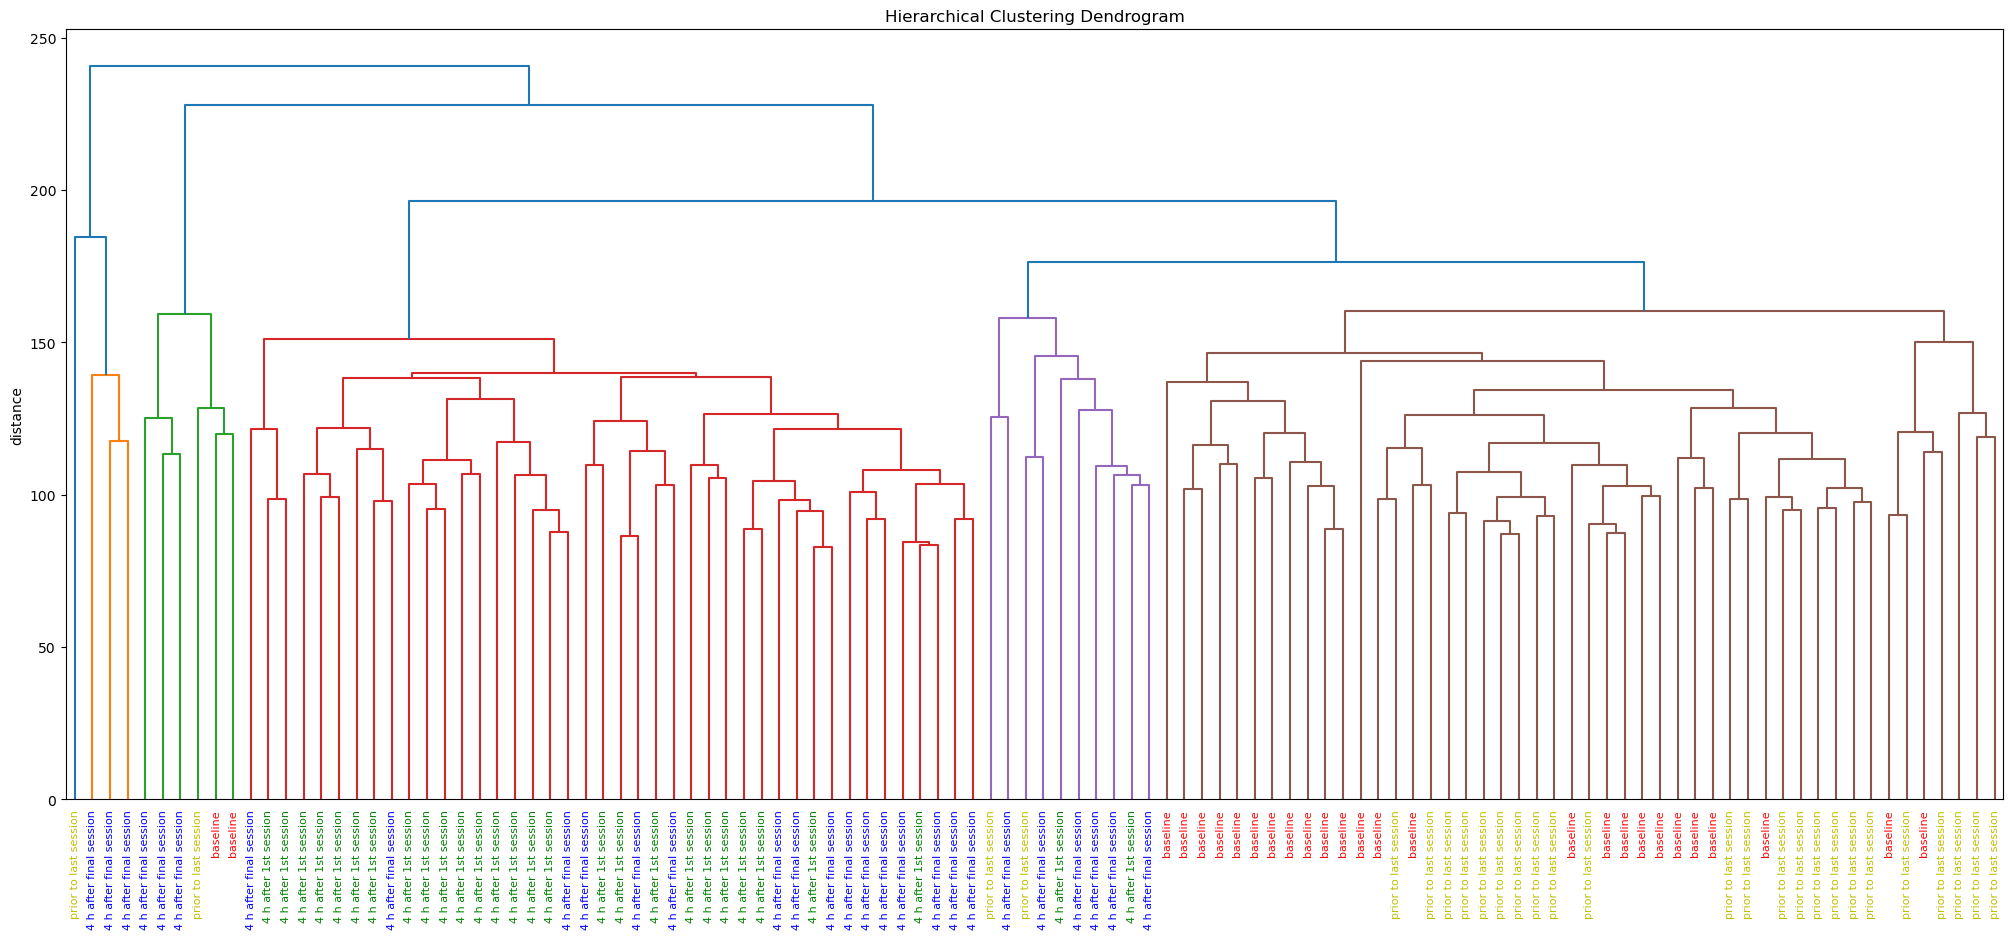

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z= linkage(input_dif, method="complete")
plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(output_data),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc. rgbc 'hour 1.5', 'hour 4' ,'hour 10','hour 24'
label_colors = {'baseline': 'r', '4 h after 1st session': 'g', '4 h after final session': 'b', 'prior to last session':'y' }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

#### Cluster Hierarquico - Método de Single

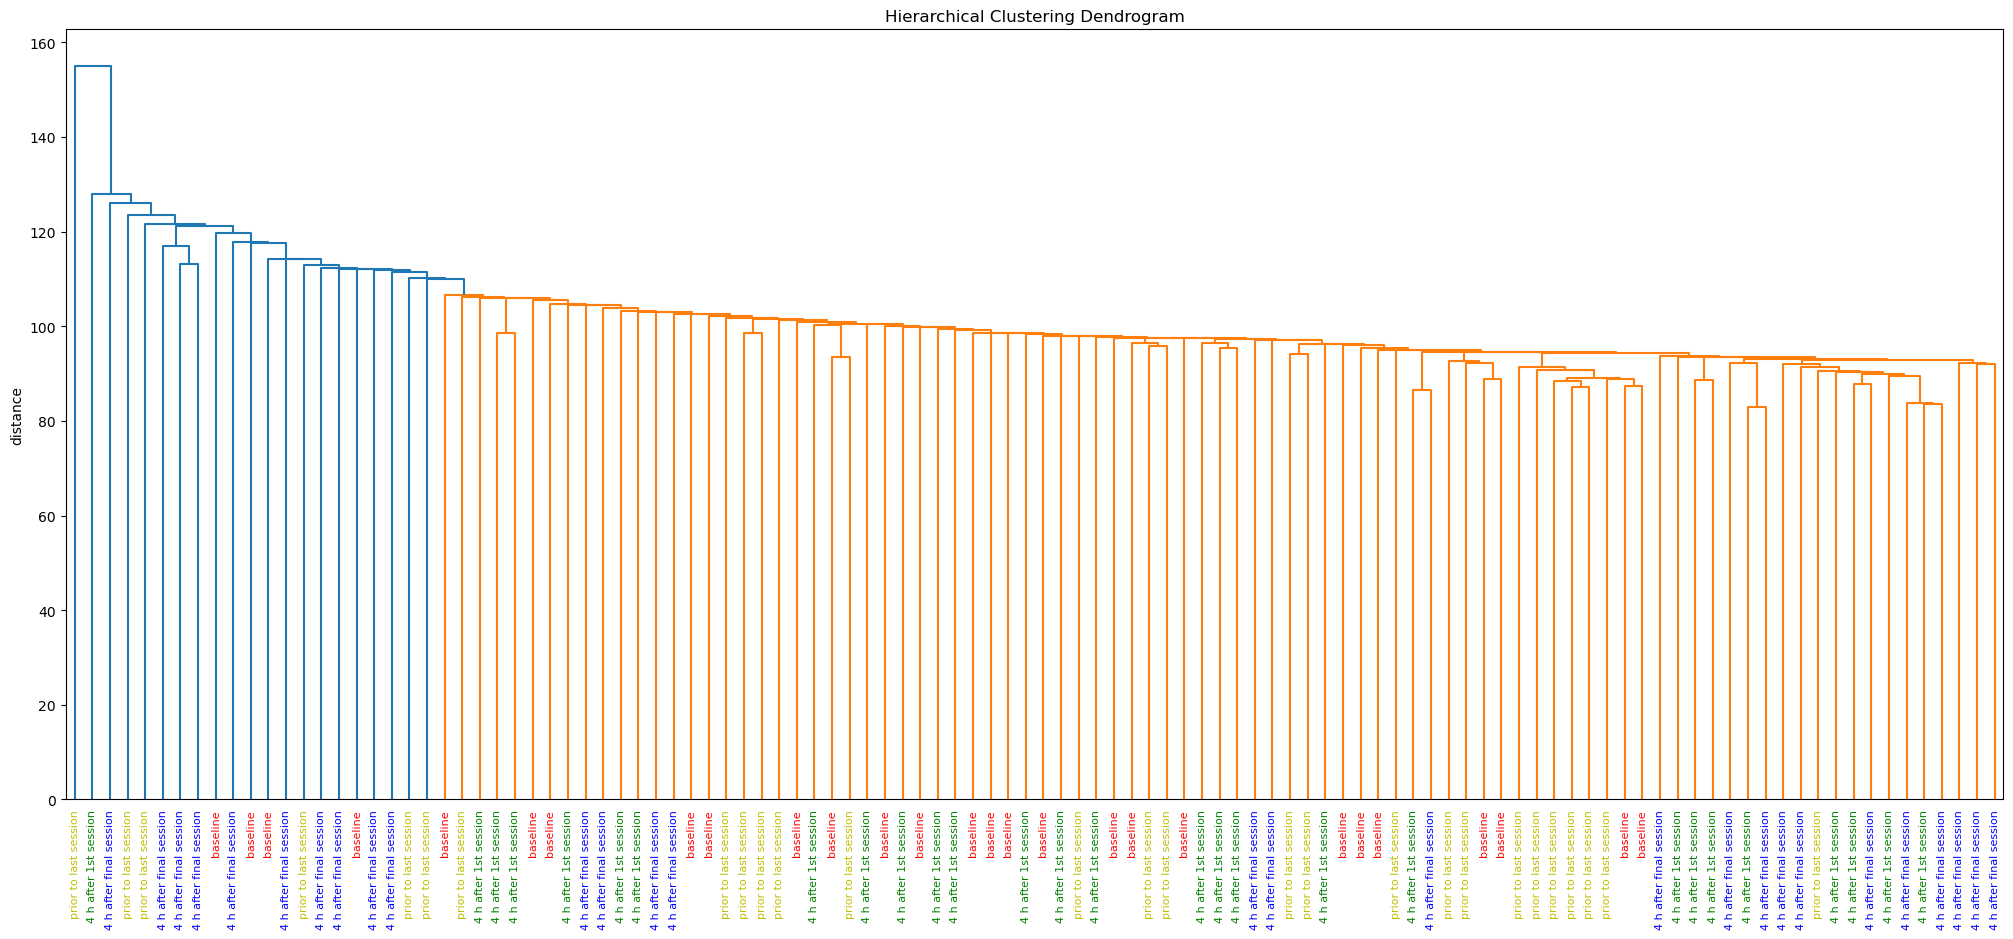

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z= linkage(input_dif, method="single")
plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(output_data),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc. rgbc 'hour 1.5', 'hour 4' ,'hour 10','hour 24'
label_colors = {'baseline': 'r', '4 h after 1st session': 'g', '4 h after final session': 'b', 'prior to last session':'y' }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

#### Cluster Hierarquico - Método de Média

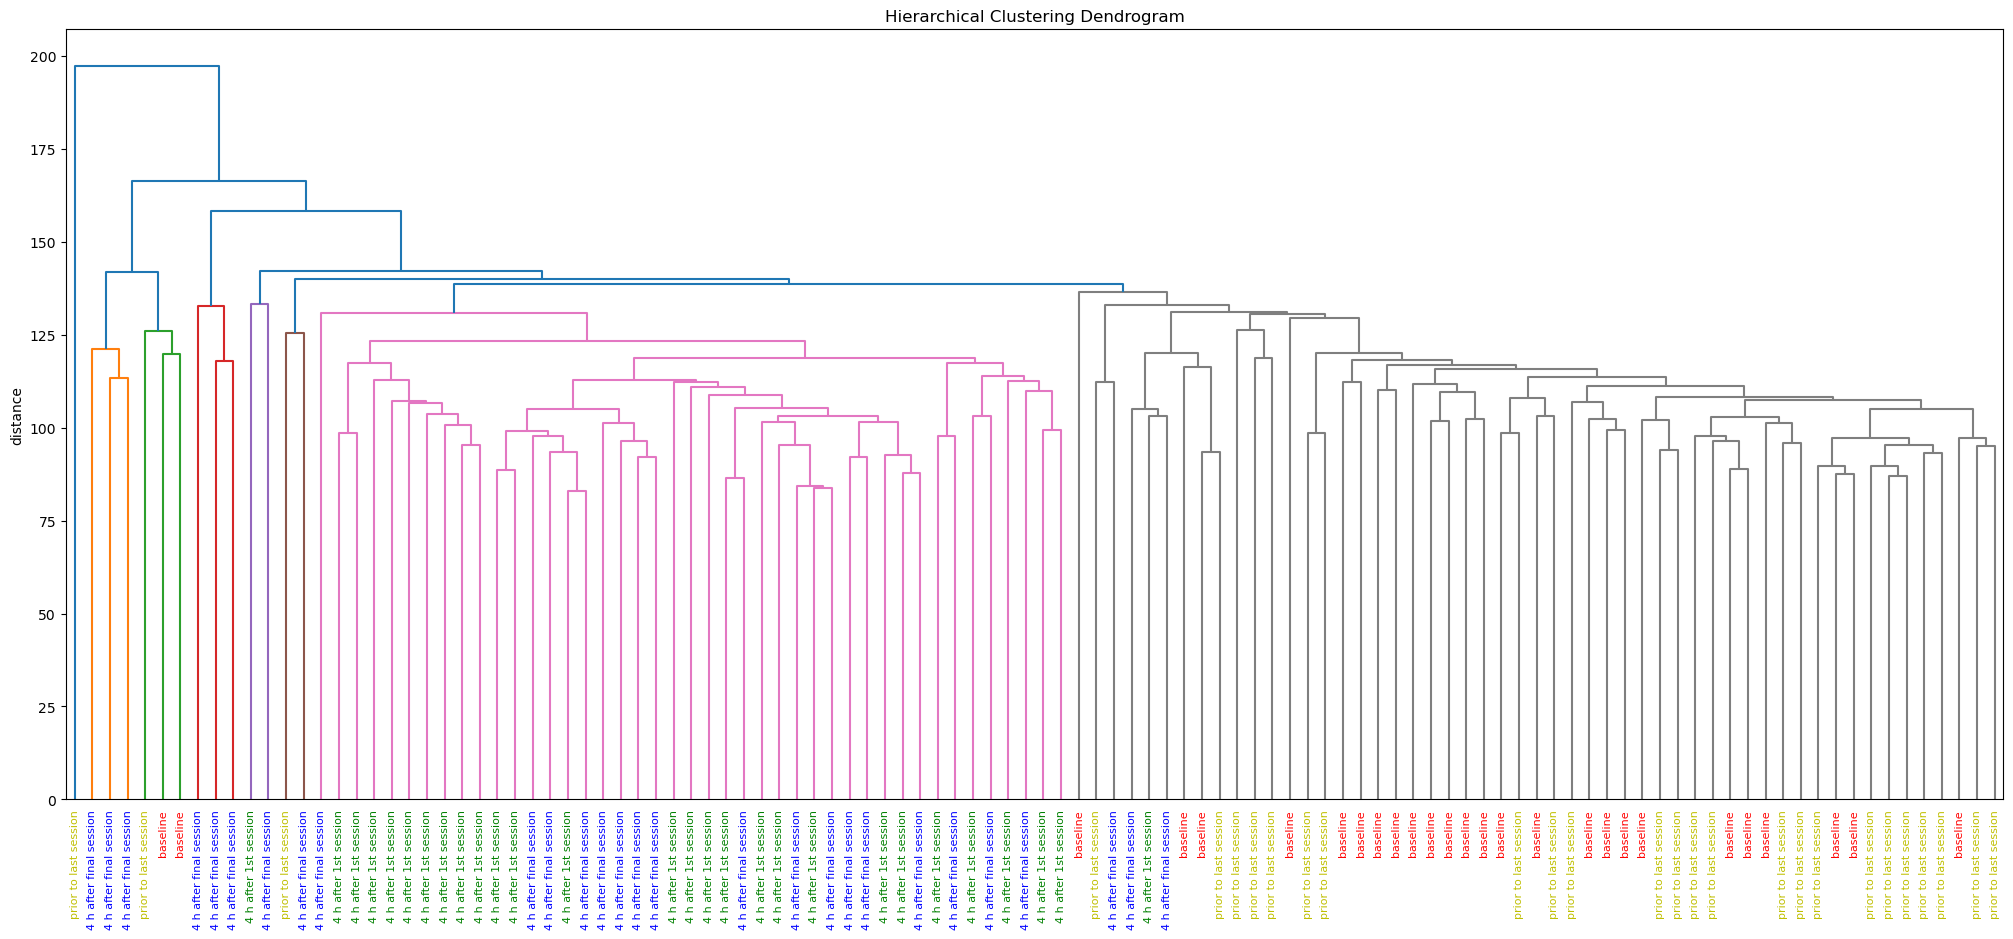

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z= linkage(input_dif, method="average")
plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(output_data),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc. rgbc 'hour 1.5', 'hour 4' ,'hour 10','hour 24'
label_colors = {'baseline': 'r', '4 h after 1st session': 'g', '4 h after final session': 'b', 'prior to last session':'y' }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

#### Cluster Hierarquico - Método de Ward

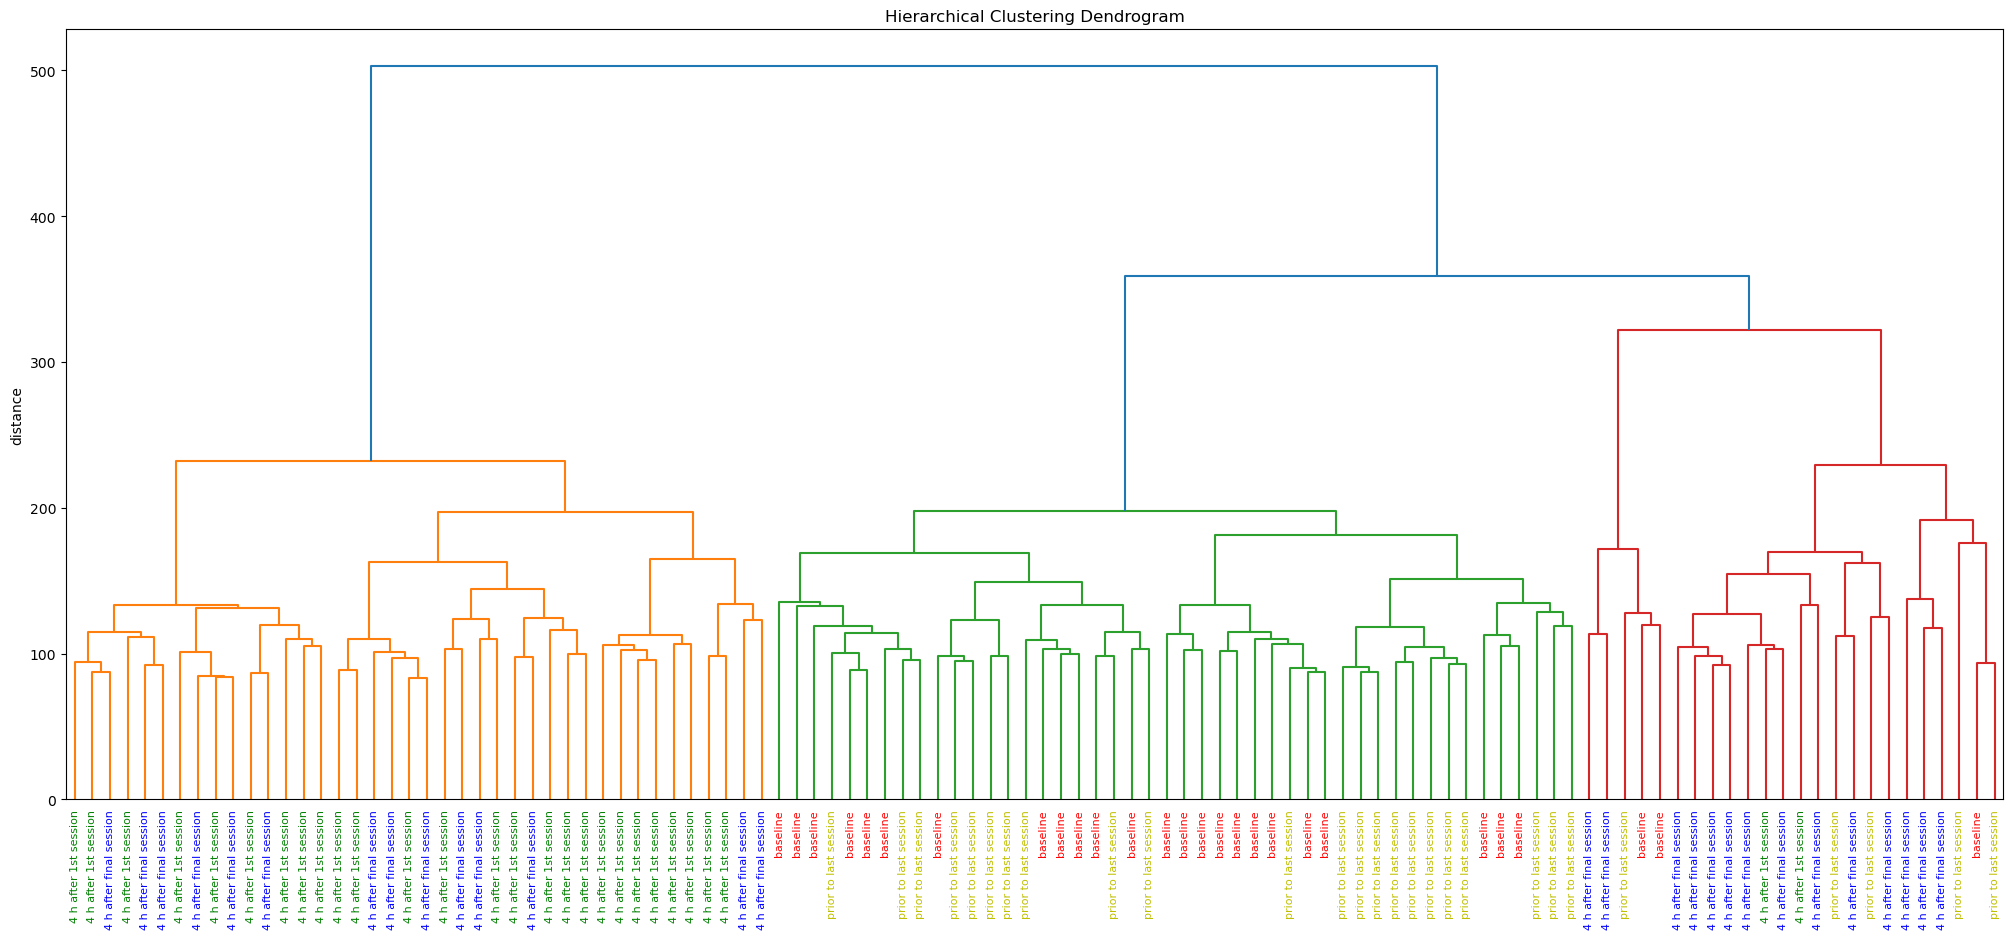

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z= linkage(input_dif, method="ward")
plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(output_data),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc. rgbc 'hour 1.5', 'hour 4' ,'hour 10','hour 24'
label_colors = {'baseline': 'r', '4 h after 1st session': 'g', '4 h after final session': 'b', 'prior to last session':'y' }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

#### Análise dos dendogramas
Analisando cada um dos dendogramas resultantes, verificamos que obtivemos diferentes quantidades de clusters para cada método de linkage: 6 para o método Complete, 2 para o método Single, 8 para o método Average e 3 para o método Ward.
Tendo em contagem que o objetivo é a criação de um modelo de classificação das amostras em 4 categorias diferentes, os métodos mais indicados seriam o Complete e o Ward. 

Porém, podemos ver que, em ambos os métodos escolhidos, existe representação de mais do que uma categoria dentro de um mesmo cluster, o que pode afetar as conclusões a serem retiradas

### Clustering k-Means

In [38]:
from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
kmeans.fit(input_dif)
labels = kmeans.labels_
centroids= kmeans.cluster_centers_
pd.crosstab (labels,meta["time"],rownames=['clusters'])

C:\Users\iamm3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


time,4 h after 1st session,4 h after final session,baseline,prior to last session
clusters,,,,
0,0,3,2,1
1,26,13,0,0
2,0,0,24,24
3,2,12,1,2


Analisando a matriz resultante do método de clustering por k-means podemos ver a presença de 4 clusters. Nos clusters 1 e 3 podemos ver a prevalência de uma categoria em relação às restantes, '4hr after 1st session' e '4hr after final session', respetivamente. Quanto aos outros 2 clusters não é possível retirar conclusões concretas.

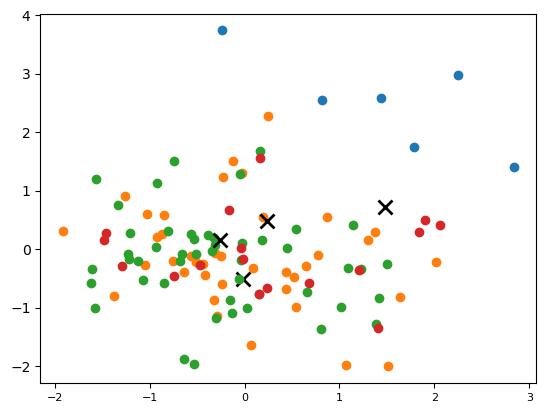

In [39]:
# Representação gráfica de centróides 2D

k = 4

for i in range(k):
    ds = data_scale[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    
    plt.setp(lines,mew=2.0)    
    
plt.show()

A representação gráfica dos centróides 2D tem como objetivo permitir a visualização da localização e a distribuição dos centróides dos clusters num plano cartesiano, o que facilita a compreensão da estrutura dos dados agrupados. 
Analisando a representação dos clusters anteriormente formados, podemos ver que existe uma elevada sobreposição o que não permite uma uma visualização clara da distribuição deste e a identificação de padrões ou tendências.

## Conclusões

Existe uma maior relação entre os dados obtidos relativos aos times *4 h after 1st session* e *4 h after final session*, no entanto também se verifica para os times *baseline* e *prior to last session*, embora menos significativa. Este facto é explicado com base nos métodos de aprendizagem utilizados, nos quais os time obtiverem números de previsões semelhantes para os mesmo clusters, nomeadamentes os times *4 h after 1st session* e *4 h after final session* e os times *baseline* e *prior to last session*, respetivamente.

# Secção 3 - Modelos/Algoritmos de Aprendizagem Máquina

## Aprendizagem Supervisionada

A aprendizagem supervisionada é uma abordagem fundamental em inteligência artificial e ciência de dados, onde um modelo é treinado usando um conjunto de dados rotulado, ou seja, dados em que as entradas já possuem rótulos ou categorias pré-definidas. O principal objetivo da aprendizagem supervisionada é aprender a mapear as entradas para as saídas desejadas, com base nos exemplos fornecidos durante o treino.

Neste contexto, o conjunto de dados de treino é composto por pares de entrada-saída, onde a entrada representa as características ou atributos dos dados e a saída corresponde às respostas ou rótulos associados a essas entradas. O modelo de aprendizagem supervisionada utiliza esses exemplos rotulados para aprender a relação entre as entradas e as saídas, permitindo fazer previsões ou tomar decisões sobre novos dados não rotulados.

Tendo em conta o estudo presente, determinou-se que a variável *target* seria a variável de metadados *time*. Esta permite uma avaliação do impacto do treino de resistência progressivo no músculo e comparar períodos temporais distintos e segmentar os dados para análises detalhadas em diferentes momentos.

In [40]:
target = meta['time']
target.value_counts() 

time
4 h after 1st session      28
4 h after final session    28
baseline                   27
prior to last session      27
Name: count, dtype: int64

### Partição dos dados: treino e teste

A partição dos dados é um processo essencial em projetos de aprendizagem máquina. Consiste em dividir o conjunto de dados disponível em dois conjuntos principais: o conjunto de treino e o conjunto de teste.

Conjunto de Treino: Utilizado para treinar o modelo de aprendizagem máquina, fornecendo exemplos para que o algoritmo aprenda a reconhecer padrões nos dados.

Conjunto de Teste: Usado para avaliar o desempenho final do modelo, após o treino. Este conjunto não é usado durante o treino e é fundamental para verificar como o modelo generaliza para dados não vistos.

Assim, foi efetuada uma partição dos dados em 70% para treino e 30% para teste.

In [45]:
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(input_dif, target, test_size=0.3)

print(data_X_train.shape)
print(data_X_test.shape)

(77, 9473)
(33, 9473)


Após dividir os dados, é crucial examinar como a variável *target* está distribuída nos conjuntos de treino e teste. Esta análise permite avaliar como a distribuição desigual pode impactar a capacidade do modelo de fazer previsões precisas em novos dados. Uma distribuição desigual pode introduzir viés e distorções, prejudicando o desempenho do modelo e resultando em previsões menos confiáveis. Portanto, é importante corrigir ou ajustar a distribuição desigual, se necessário, para garantir que o modelo seja capaz de generalizar adequadamente e produzir previsões precisas em diferentes cenários.

time
baseline                   21
prior to last session      20
4 h after final session    19
4 h after 1st session      17
Name: count, dtype: int64


<Axes: ylabel='count'>

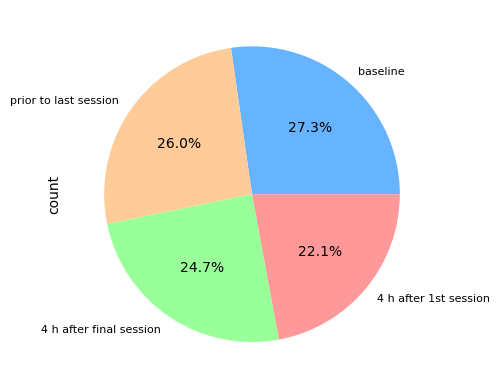

In [46]:
# Verificar se a distribuição do target é a mesma no treino e teste
counts_train = data_y_train.value_counts()
print(counts_train)

mapeamento_cores = {
    '4 h after 1st session': '#ff9999', 
    'baseline': '#66b3ff', 
    '4 h after final session': '#99ff99', 
    'prior to last session': '#ffcc99'
}

# Criar lista de cores baseada nas categorias
cores_personalizadas = [mapeamento_cores[categoria] for categoria in counts_train.index]


counts_train.plot.pie(autopct='%1.1f%%', colors=cores_personalizadas)

time
baseline                   9
4 h after 1st session      9
4 h after final session    8
prior to last session      7
Name: count, dtype: int64


<Axes: ylabel='count'>

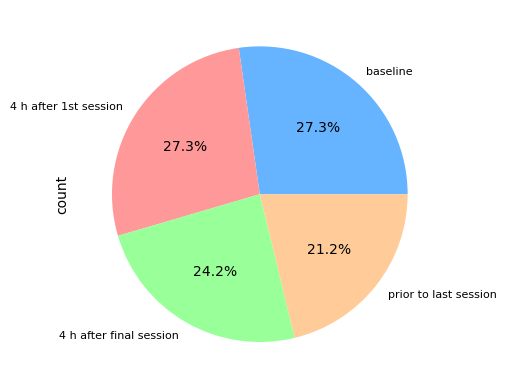

In [43]:
counts_test = data_y_test.value_counts()
print(counts_test)

mapeamento_cores = {
    '4 h after 1st session': '#ff9999', 
    'baseline': '#66b3ff', 
    '4 h after final session': '#99ff99', 
    'prior to last session': '#ffcc99'
}

# Criar lista de cores baseada nas categorias
cores_personalizadas = [mapeamento_cores[categoria] for categoria in counts_test.index]

counts_test.plot.pie(autopct='%1.1f%%', colors=cores_personalizadas)

### Árvore de Decisão

Accuracy: 0.73
Precision: 0.74


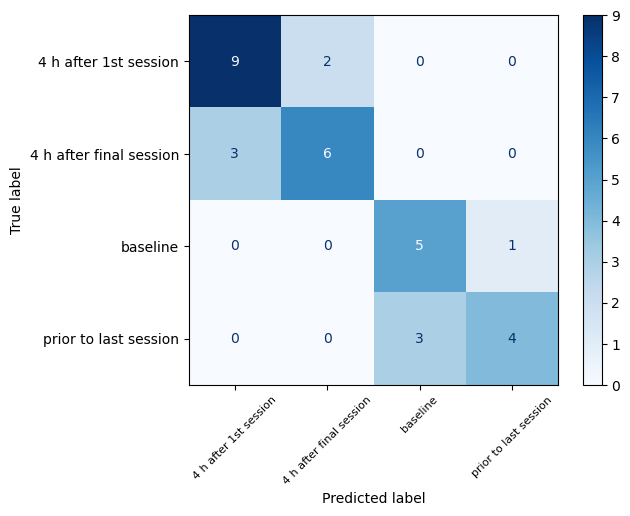

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(data_X_train, data_y_train)

tree_y_pred = tree_model.predict(data_X_test)
tree_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, tree_y_pred, display_labels=tree_model.classes_, cmap='Blues')
tree_cm
plt.xticks(rotation=45)
tree_model_split=tree_model.score(data_X_test, data_y_test)
print('Accuracy: %0.2f' %tree_model_split )
print('Precision: %0.2f' % precision_score(data_y_test, tree_y_pred, average='weighted'))

### K-nearest Neighbors

Accuracy: 0.88
Precision: 0.88


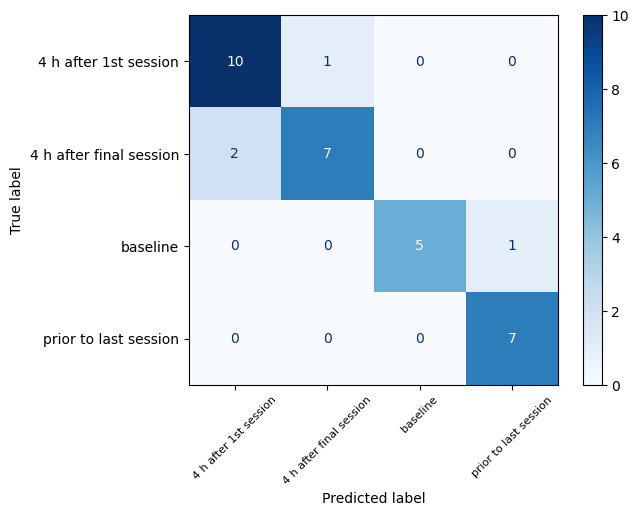

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(data_X_train, data_y_train)

knn_y_pred = knn_model.predict(data_X_test)
knn_split=knn_model.score(data_X_test, data_y_test)
print('Accuracy: %0.2f' % knn_split)
print('Precision: %0.2f' % precision_score(data_y_test, knn_y_pred, average='weighted'))

knn_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, knn_y_pred, display_labels=knn_model.classes_, cmap='Blues')
knn_cm
plt.xticks(rotation=45);

### Regressão Logistica

Accuracy: 0.85
Precision: 0.86


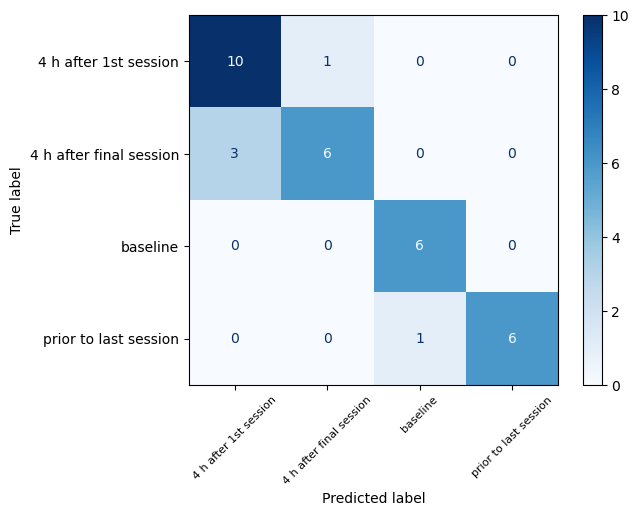

In [55]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")

logistic.fit(data_X_train, data_y_train)

logistic_y_pred = logistic.predict(data_X_test)
log_split=logistic.score(data_X_test, data_y_test)
print('Accuracy: %0.2f' %log_split )
print('Precision: %0.2f' % precision_score(data_y_test, logistic_y_pred, average='weighted'))

logistic_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, logistic_y_pred, display_labels=logistic.classes_, cmap='Blues')
logistic_cm
plt.xticks(rotation=45);

### Suport Vector Machine - Kernel Linear

Accuracy: 0.85
Precision: 0.86


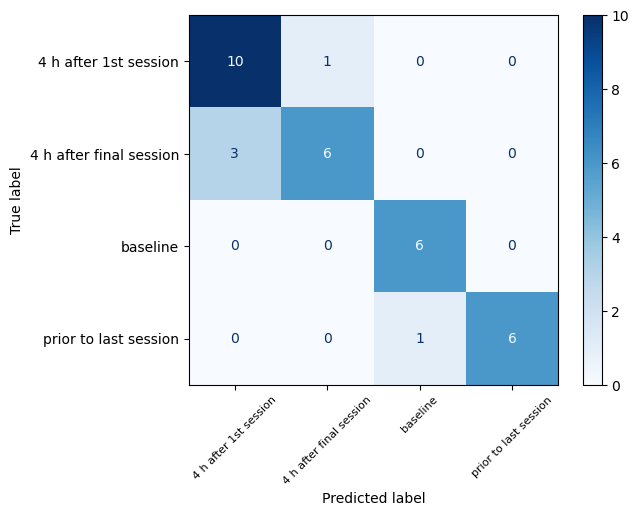

In [56]:
from sklearn import svm

svm_linear = svm.SVC(kernel = "linear")

svm_linear.fit(data_X_train, data_y_train)

svm_linear_y_pred = svm_linear.predict(data_X_test)
svm_split=svm_linear.score(data_X_test, data_y_test)
print('Accuracy: %0.2f' % svm_split )
print('Precision: %0.2f' % precision_score(data_y_test, svm_linear_y_pred, average='weighted'))

svm_linear_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, svm_linear_y_pred, display_labels=svm_linear.classes_, cmap='Blues')
svm_linear_cm
plt.xticks(rotation=45);

### Random Forest

Accuracy: 0.82
Precision: 0.82


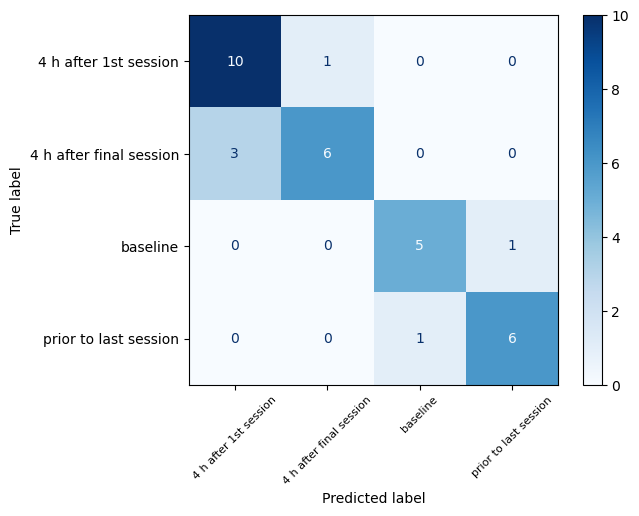

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(data_X_train, data_y_train)

rf_model_y_pred = rf_model.predict(data_X_test)
rf_split=rf_model.score(data_X_test, data_y_test)
print('Accuracy: %0.2f' % rf_split)
print('Precision: %0.2f' % precision_score(data_y_test, rf_model_y_pred, average='weighted'))

rf_model_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, rf_model_y_pred, display_labels=rf_model.classes_, cmap='Blues')
rf_model_cm
plt.xticks(rotation=45);

Accuracy: 0.85
Precision: 0.86


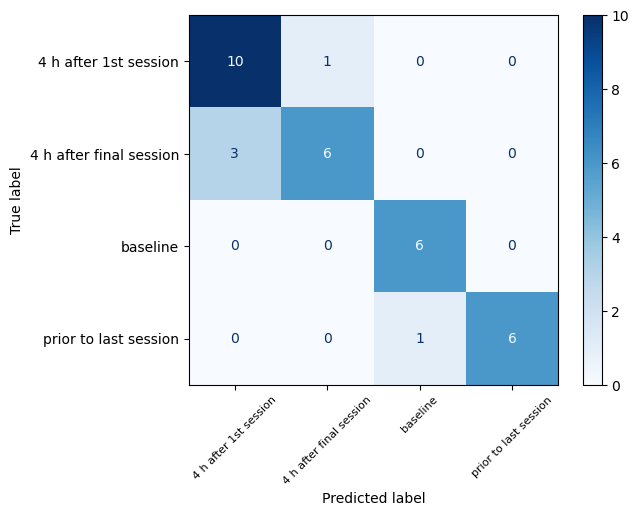

In [53]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(estimators=[('svm', svm_linear), ('lr', logistic), ('rf', rf_model)], voting='hard')

vot_model.fit(data_X_train, data_y_train)

vot_model_y_pred = vot_model.predict(data_X_test)
print('Accuracy: %0.2f' % vot_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, vot_model_y_pred, average='weighted'))

vot_model_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, vot_model_y_pred, display_labels=vot_model.classes_, cmap='Blues')
vot_model_cm
plt.xticks(rotation=45);

## Cross Validation

Será feita a divisão do conjunto de dados em k folds ( nosso caso k=5 folds ). Teremos então k momentos de treino onde cada fold será usada uma vez como teste e as k-1 folds restantes serão usadas no momento como treino. Tendo assim para um conjunto de dados menor, uma maior varaibilidade de dados de treino e de teste.



### K-nearest Neighbors

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

score_knn = cross_val_score(knn_model, input_dif, target, cv = 5).mean()


### Regressão Logistica

In [67]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")

score_lr = cross_val_score(logistic, input_dif, target, cv = 5).mean()
score_lr

0.9454545454545455

### Árvore de Decisão

In [68]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

score_tree = cross_val_score(tree_model, input_dif, target, cv = 5).mean()
score_tree

0.7545454545454545

### Support Vector Machine - com kernel linear

In [69]:
from sklearn import svm

svm_linear = svm.SVC(kernel = "linear")

score_svm = cross_val_score(svm_linear, input_dif, target, cv = 5).mean()
score_svm

0.9272727272727274

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

score_rf = cross_val_score(rf_model, input_dif, target, cv = 5).mean()
score_rf

0.9

In [72]:
print("Acc - Decision Tree - Split", tree_model_split,)
print(f"Acc - Decision Tree - Cross Validation", score_tree)
print(f"Acc - KNN - Split", knn_split)
print(f"Acc - KNN - Cross Validation", score_knn)
print(f"Acc - Regressão Logistica - Split ",log_split)
print(f"Acc - Regressão Logistica - Cross Validation ",score_lr)
print(f"Acc - SVM - Split", svm_split)
print(f"Acc - SVM - Cross Validation ",score_svm)
print(f"Acc - Random Forest - Split", rf_split)
print(f"Acc - Random Forest - Cross Validation", score_rf)


Acc - Decision Tree - Split 0.7272727272727273
Acc - Decision Tree - Cross Validation 0.7545454545454545
Acc - KNN - Split 0.8787878787878788
Acc - KNN - Cross Validation 0.8363636363636363
Acc - Regressão Logistica - Split  0.8484848484848485
Acc - Regressão Logistica - Cross Validation  0.9454545454545455
Acc - SVM - Split 0.8484848484848485
Acc - SVM - Cross Validation  0.9272727272727274
Acc - Random Forest - Split 0.8181818181818182
Acc - Random Forest - Cross Validation 0.9


### Conclusão

Através dos valores de *accuracy* obtidos é possível observar que método de repartição *Cross Validation* têm de uma maneira geral melhores resultados, com a excessão do KNN. Observa-se também que dos métodos testados o que apresenta melhores resultados é *Regressão Logistica*